### Feature Extraction

#### DictVectorizer

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]

In [3]:
np.array(data) #create numpy array

array([{'age': 4, 'height': 96.0}, {'age': 1, 'height': 73.9},
       {'age': 3, 'height': 88.9}, {'age': 2, 'height': 81.6}],
      dtype=object)

In [4]:
pd.DataFrame(data) #create dataframe

,age,height
0,4,96.0
1,1,73.9
2,3,88.9
3,2,81.6


In [5]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit_transform(data) #creates a 2-d matrix

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

### Data cleaning

#### SimpleImputer

In [6]:
X = np.array([[7, 1], [None, 8], [2, None], [9, 6]])

In [7]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
si.fit_transform(X)

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

#### KNNImputer

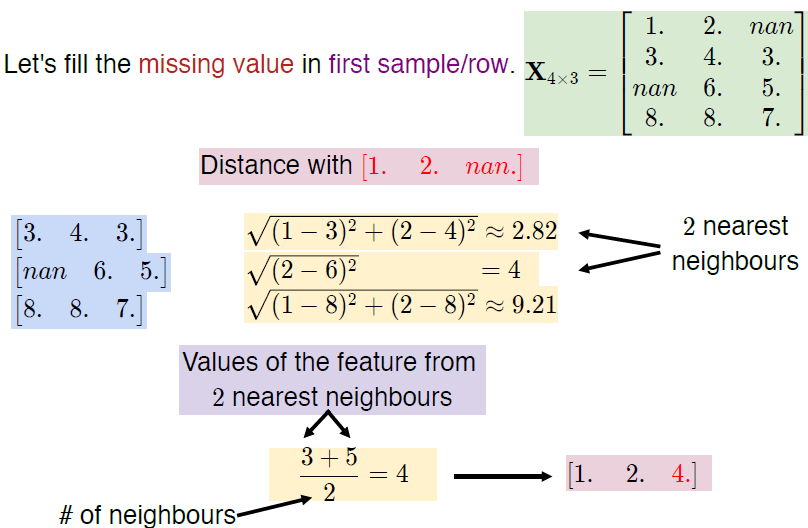

In [8]:
from sklearn.impute import KNNImputer

X = np.array([[1, 2, None], [3, 4, 3], [None, 6, 5], [8, 8, 7]])
knn = KNNImputer(n_neighbors=2, weights='uniform')
knn.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [9]:
from sklearn.impute import MissingIndicator

X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
indicator = MissingIndicator()
indicator.fit_transform(X)

array([[False,  True],
       [False, False],
       [ True, False],
       [False, False]])

#### StandardScaler 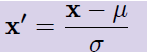

In [10]:
from sklearn.preprocessing import StandardScaler

X = np.array([4, 3, 2, 5, 6]).reshape((5, 1))

In [11]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.        ],
       [-0.70710678],
       [-1.41421356],
       [ 0.70710678],
       [ 1.41421356]])

#### MinMaxScaler 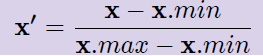

In [12]:
from sklearn.preprocessing import MinMaxScaler

X = np.array([15, 2, 5, -2, -5]).reshape((5,1))

In [13]:
mm = MinMaxScaler()
mm.fit_transform(X)

array([[1.  ],
       [0.35],
       [0.5 ],
       [0.15],
       [0.  ]])

#### MaxAbsScaler 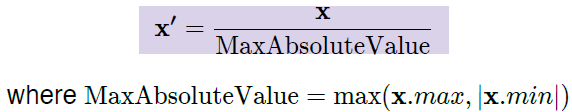

In [14]:
from sklearn.preprocessing import MaxAbsScaler

X = np.array([4, 2, 5, -2, -100]).reshape((5, 1))

In [15]:
ma = MaxAbsScaler()
ma.fit_transform(X)

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

#### FunctionTransfomer (Transforms based on user-defined function)

In [16]:
from sklearn.preprocessing import FunctionTransformer
X = np.array([[128, 2], [2, 256], [4, 1], [512, 64]])

In [17]:
ft = FunctionTransformer(np.log2)
ft.fit_transform(X)

array([[7., 1.],
       [1., 8.],
       [2., 0.],
       [9., 6.]])

In [18]:
ft = FunctionTransformer(np.mean) # mean of all elements
ft.fit_transform(X)

121.125

#### PolynomialTransfomation (Create all polynomial combinations)

In [19]:
X = np.array([[2, 3],[4, 5],[6,7]]) #Same example has been used in MLT Week-3 Cell #13

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,  36.,  42.,  49., 216., 252., 294., 343.]])

#### KBinsDiscretizer (Binning + One hot/ordinal encoding)

In [21]:
X = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0]).reshape(9,1)

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

KBD = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='onehot')
X_fit = KBD.fit_transform(X) #return sparse matrix
X_fit.toarray() #convert to numpy array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [23]:
X_fit.todense() #convert to matrix

matrix([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

#### Categorical Transformers

#### One-hot encoder

In [24]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([1, 2, 6, 1, 8, 6]).reshape(6, 1) #4 unique values
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X) #one column for each unique value

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

#### Label encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

X = np.array([1, 2, 6, 1, 8, 6]).reshape(6, ) #4 unique values.  If this is reshape to (6, 1), it gives a warning; why?
le = LabelEncoder()
le.fit_transform(X) # 1 is encoded as 0, 2 as 1, 6 as 2, and 8 as 3.

array([0, 1, 2, 0, 3, 2], dtype=int64)

#### Ordinal encoder

OrdinalEncoder can operate multi dimensional data, while LabelEncoder can transform only 1D data.

In [26]:
from sklearn.preprocessing import OrdinalEncoder

X = np.array([[1, 2, 6, 1, 8, 6], ['male', 'female', 'female', 'male', 'male', 'female']]).T
oe = OrdinalEncoder()
oe.fit_transform(X) # 1 is encoded as 0, 2 as 1, 6 as 2, and 8 as 3; 'male' as 1 and 'female' as 0

array([[0., 1.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [3., 1.],
       [2., 0.]])

#### LabelBinarizer

In [27]:
from sklearn.preprocessing import LabelBinarizer
X = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']).reshape(10, 1)
lb = LabelBinarizer()
lb.fit_transform(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [28]:
# OneHotEncoder on this data produces the same result.  The only difference between OneHotEncoder and LabelBinarizer 
# appears to be that the former return a sparse matrix by default, while the latter returns a dense matrix by default.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

#### MultiLabelBinarizer

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

X = np.array([{'action', 'comedy' },
{'comedy'},
{'action', 'thriller'},
{'science-fiction', 'action', 'thriller'}]) #4 unique values

mlb = MultiLabelBinarizer()
mlb.fit_transform(X) # the columns are 'action', 'comedy', 'science-fiction' and 'thriller'

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

#### add_dummy_feature

In [30]:
from sklearn.preprocessing import add_dummy_feature

X = np.array([[7, 1], [1, 8], [2, 0], [9, 6]])

add_dummy_feature(X)

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])